In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x = np.random.uniform(-3, 3 , size=100)
X = x.reshape(-1, 1)
y = 0.5 * x**2 + 2 + np.random.normal(0, 1, 100)

In [3]:
from sklearn.preprocessing import PolynomialFeatures

In [4]:
poly = PolynomialFeatures(degree=2)
poly.fit(X)
X2 = poly.transform(X)

In [5]:
X2.shape

(100, 3)

In [6]:
X2[:5,:]

array([[ 1.        ,  2.95156812,  8.71175434],
       [ 1.        , -2.52304445,  6.36575328],
       [ 1.        ,  2.92984805,  8.58400962],
       [ 1.        ,  1.44447817,  2.08651717],
       [ 1.        , -1.38517407,  1.91870721]])

In [7]:
from sklearn.linear_model import LinearRegression

In [8]:
lin_reg2 = LinearRegression()
lin_reg2.fit(X2, y)
y_predict = lin_reg2.predict(X2)

绘制预测的结果

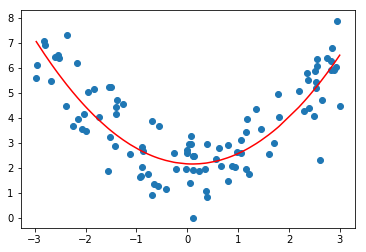

In [9]:
plt.scatter(x, y)
plt.plot(np.sort(x), y_predict[np.argsort(x)], color='r')

In [10]:
lin_reg2.coef_

array([ 0.        , -0.10639728,  0.52013834])

In [11]:
lin_reg2.intercept_

2.1556950876060466

### 关于PolynomialFeatures
对于数据比较复杂的如果说是两个特征的那种情况机会应该这样来做

In [12]:
X = np.arange(1, 11).reshape(-1,2)

In [13]:
X.shape

(5, 2)

In [14]:
X

array([[ 1,  2],
       [ 3,  4],
       [ 5,  6],
       [ 7,  8],
       [ 9, 10]])

In [15]:
poly = PolynomialFeatures(degree=2)
poly.fit(X)
X2 = poly.transform(X)

In [16]:
X2.shape

(5, 6)

In [17]:
X2

array([[  1.,   1.,   2.,   1.,   2.,   4.],
       [  1.,   3.,   4.,   9.,  12.,  16.],
       [  1.,   5.,   6.,  25.,  30.,  36.],
       [  1.,   7.,   8.,  49.,  56.,  64.],
       [  1.,   9.,  10.,  81.,  90., 100.]])

注意如果有两列特征，那么第一列不用管。第二三列分别是平方项以及这两项相乘的结果
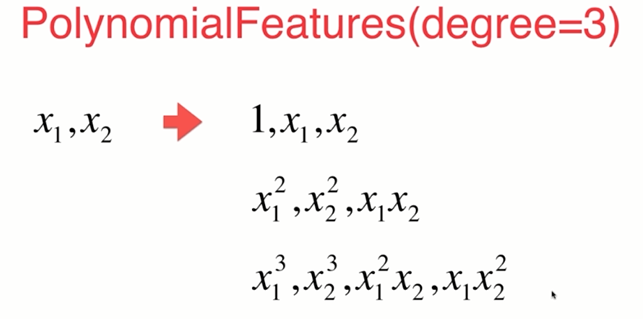

### pipeline

数据的归一化问题就是这样的,

In [18]:
x = np.random.uniform(-3, 3,size=100)
X = x.reshape(-1, 1)
y = 0.5 * x ** 2 + 2 + np.random.normal(0, 1,100)

In [19]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
poly_reg = Pipeline([
    ("poly", PolynomialFeatures(degree=2)),
    ("std_scaler",StandardScaler()),
    ("lin_reg",LinearRegression())
])

In [20]:
poly_reg.fit(X, y)
y_predict = poly_reg.predict(X)

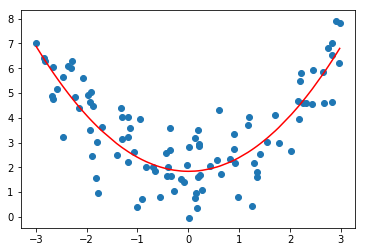

In [21]:
plt.scatter(x, y)
plt.plot(np.sort(x), y_predict[np.argsort(x)],color='r')